Нупрейчик Маргарита, гр. 2373

In [1]:
import pandas as pd

df = pd.read_csv('prepared_dataset.csv')
df.head()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0,23,84,1,0,0,7,73,1,1,...,1,2,1,2,3,0,1,2,1,67
1,1,19,64,1,2,0,8,59,1,1,...,2,2,1,0,4,0,0,1,0,61
2,2,24,98,2,2,1,7,91,2,1,...,2,2,1,1,4,0,2,2,1,74
3,3,29,89,1,2,1,8,98,2,1,...,2,2,1,0,4,0,1,1,1,71
4,4,19,92,2,2,1,6,65,2,1,...,2,0,1,1,4,0,0,2,0,70


При сохранении файла создалась доп. колонка с нумерацией строк. Ее удаляем за ненадобностью.

In [2]:
df = df.drop(columns='Unnamed: 0', axis=1)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


Добавляемый атрибут - ExamsDifference - разница в баллах между последним (Exam_Score) и предыдущим (Previous_Scores) результатами экзамена.

In [7]:
df['Scores_Difference'] = df.apply(lambda x: x['Exam_Score'] - x['Previous_Scores'], axis=1)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Scores_Difference
0,23,84,1,0,0,7,73,1,1,0,...,2,1,2,3,0,1,2,1,67,-6
1,19,64,1,2,0,8,59,1,1,2,...,2,1,0,4,0,0,1,0,61,2
2,24,98,2,2,1,7,91,2,1,2,...,2,1,1,4,0,2,2,1,74,-17
3,29,89,1,2,1,8,98,2,1,1,...,2,1,0,4,0,1,1,1,71,-27
4,19,92,2,2,1,6,65,2,1,3,...,0,1,1,4,0,0,2,0,70,5


Работа с датасетом: поиск дублей, удаление выбросов.

In [8]:
duplicate = df[df.duplicated()]
duplicate.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Scores_Difference


Одинаковых строк в датасете не обнаружено.

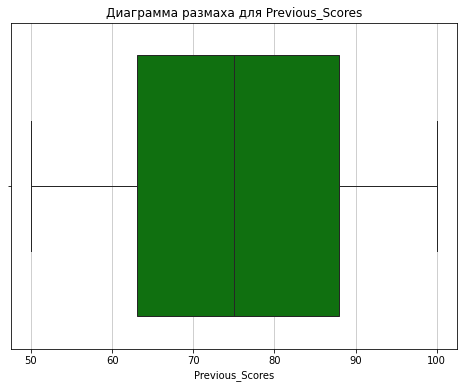

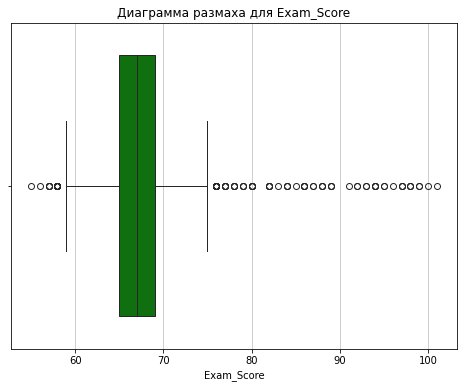

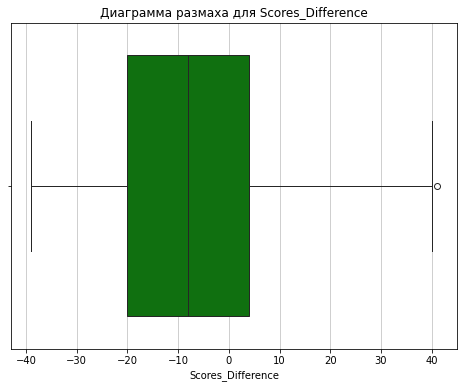

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

scores_features = ['Previous_Scores', 'Exam_Score', 'Scores_Difference']

for feature in scores_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], color='green')
    plt.title(f'Диаграмма размаха для {feature}')
    plt.xlabel(feature)
    plt.grid(axis='x', alpha=0.75)
    plt.show()

В первой лабораторной работе были построенны диаграммы размаха для всех числовых признаков. На 3 из 7 было отмечено наличие выбросов. Наибольшее количество отмечено у признака Exam_Score. Используя новый признак, можно посмотреть, как изменились результаты сдающих - и результат весьма любопытный. При сдаче в первый раз, студенты показали неплохие результаты (они распределены в целом равномерно). Но при финальной сдаче результаты заметно просели (см. гистограммы в 1 л.р.).  
По диаграмме размаха признака Scores_Difference можно сделать вывод, что около 70% учащхся ухудшили свой результат.  
На основании этого я предполагаю, что говорить о выбросах у признака Exam_Score нельзя.